In [124]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [27]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [125]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [192]:
neg, pos = np.bincount(raw_df['Class']) #similar to value_counts
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [127]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [128]:
cleaned_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


Split the dataset into train, validation, and test sets. The validation set is used during the model fitting to evaluate the loss and any metrics, however the model is not fit with this data. The test set is completely unused during the training phase and is only used at the end to evaluate how well the model generalizes to new data. This is especially important with imbalanced datasets where overfitting is a significant concern from the lack of training data.

In [129]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.

Note: The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.

In [130]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


In [131]:
import seaborn as sns
sns.set_style('darkgrid')

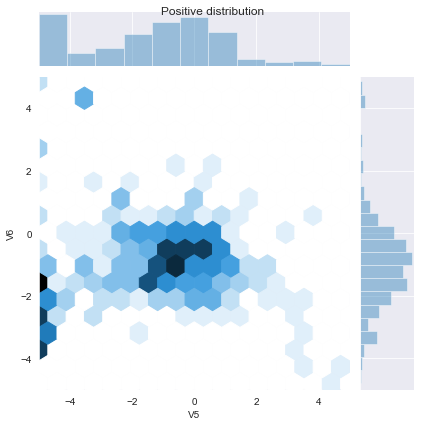

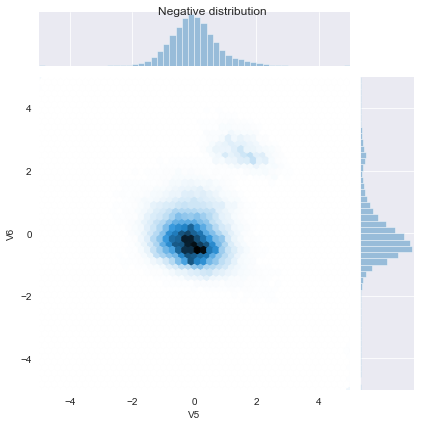

In [132]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

Define the model and metrics
Define a function that creates a simple neural network with a densly connected hidden layer, a dropout layer to reduce overfitting, and an output sigmoid layer that returns the probability of a transaction being fraudulent:

Note: Accuracy is not a helpful metric for this task. You can 99.8%+ accuracy on this task by predicting False all the time.

In [133]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
            keras.layers.Dense(16, activation='relu',input_shape=(train_features.shape[-1],)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1, activation='sigmoid',bias_initializer=output_bias),
                             ])

    model.compile(
          optimizer=keras.optimizers.Adam(lr=1e-3),
          loss=keras.losses.BinaryCrossentropy(),
          metrics=metrics)

    return model

In [134]:
EPOCHS = 10
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [135]:
model = make_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                480       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.predict(train_features[:10])

array([[0.19147134],
       [0.18579388],
       [0.28691918],
       [0.45208454],
       [0.43557155],
       [0.45997468],
       [0.31871915],
       [0.3662486 ],
       [0.71314937],
       [0.1809322 ]], dtype=float32)

In [137]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4098


Set that as the initial bias, and the model will give much more reasonable initial guesses.
It should be near: pos/total = 0.0018

In [138]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [139]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.00064105],
       [0.00057968],
       [0.00259328],
       [0.00240543],
       [0.00184628],
       [0.00084707],
       [0.00176001],
       [0.00107166],
       [0.00115606],
       [0.00161223]], dtype=float32)

In [140]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0162


Checkpoint the initial weights
To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.

In [141]:
initial_weights = os.path.join('./initial_weights_keep','initial_weights')
model.save_weights(initial_weights)

Confirm that the bias fix helps
Before moving on, confirm quick that the careful bias initialization actually helped.

Train the model for 20 epochs, with and without this careful initialization, and compare the losses:

In [142]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0]) ##set bias to zero
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [143]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [144]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
                   color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
              color=colors[n], label='Val '+label,
              linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()

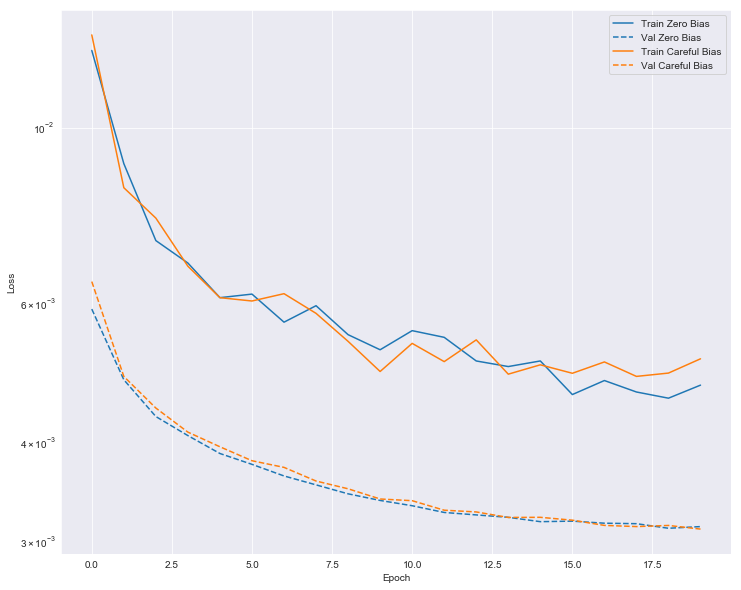

In [145]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

Train the model

In [146]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping], 
    validation_data=(val_features, val_labels))

Train on 182276 samples, validate on 45569 samples
Epoch 1/10
182276/182276 [==============================] - 6s 30us/sample - loss: 0.0129 - tp: 43.0000 - fp: 54.0000 - tn: 181872.0000 - fn: 307.0000 - accuracy: 0.9980 - precision: 0.4433 - recall: 0.1229 - auc: 0.7025 - val_loss: 0.0062 - val_tp: 15.0000 - val_fp: 3.0000 - val_tn: 45496.0000 - val_fn: 55.0000 - val_accuracy: 0.9987 - val_precision: 0.8333 - val_recall: 0.2143 - val_auc: 0.8781
Epoch 2/10
182276/182276 [==============================] - 2s 10us/sample - loss: 0.0086 - tp: 116.0000 - fp: 34.0000 - tn: 181892.0000 - fn: 234.0000 - accuracy: 0.9985 - precision: 0.7733 - recall: 0.3314 - auc: 0.8282 - val_loss: 0.0048 - val_tp: 30.0000 - val_fp: 5.0000 - val_tn: 45494.0000 - val_fn: 40.0000 - val_accuracy: 0.9990 - val_precision: 0.8571 - val_recall: 0.4286 - val_auc: 0.8854
Epoch 3/10
182276/182276 [==============================] - 2s 10us/sample - loss: 0.0069 - tp: 157.0000 - fp: 27.0000 - tn: 181899.0000 - fn: 193.0

In [147]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[n], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[n], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()


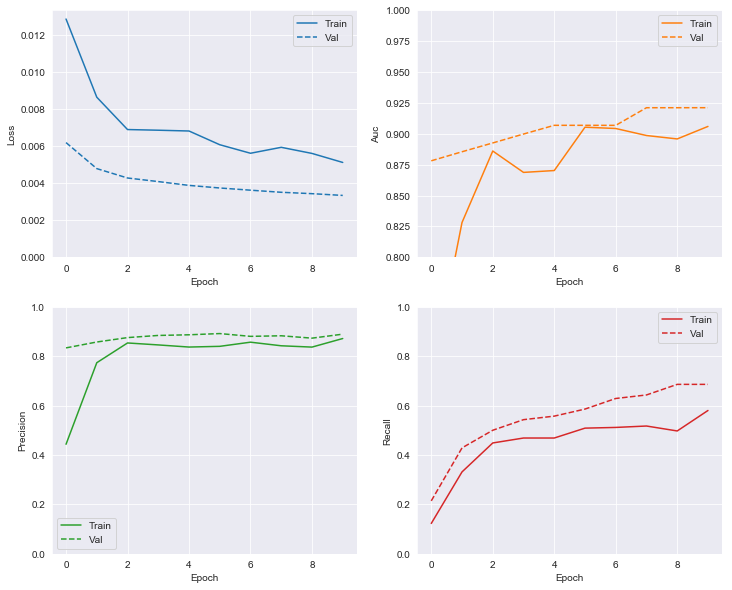

In [148]:
plot_metrics(baseline_history)

Note: That the validation curve generally performs better than the training curve. This is mainly caused by the fact that the dropout layer is not active when evaluating the model.

In [149]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [150]:
def plot_cm(labels, predictions, p=0.5):
    
    cm = confusion_matrix(labels, predictions > p)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.002279817993435928

tp :  57.0

fp :  9.0

tn :  56881.0

fn :  15.0

accuracy :  0.99957865

precision :  0.8636364

recall :  0.7916667

auc :  0.9372548

Legitimate Transactions Detected (True Negatives):  56881
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  57
Total Fraudulent Transactions:  72


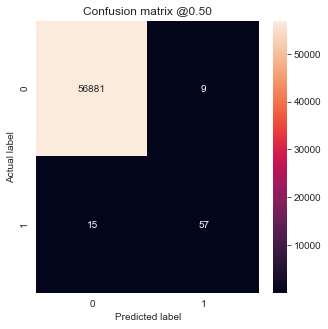

In [151]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
    print()

plot_cm(test_labels, test_predictions_baseline)

In [152]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

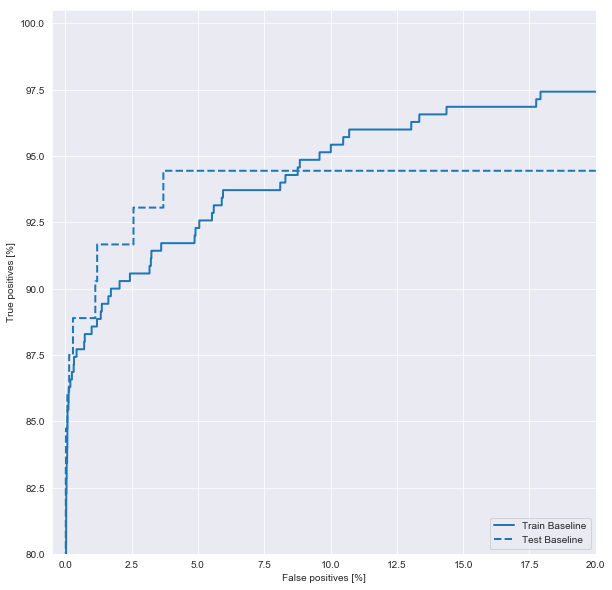

In [153]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [154]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_labels),
                                                 train_labels)

In [155]:
class_weights

array([  0.50096193, 260.39428571])

In [156]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Train on 182276 samples, validate on 45569 samples
Epoch 1/10
182276/182276 [==============================] - 6s 31us/sample - loss: 0.0127 - tp: 48.0000 - fp: 40.0000 - tn: 181886.0000 - fn: 302.0000 - accuracy: 0.9981 - precision: 0.5455 - recall: 0.1371 - auc: 0.7177 - val_loss: 0.0058 - val_tp: 19.0000 - val_fp: 4.0000 - val_tn: 45495.0000 - val_fn: 51.0000 - val_accuracy: 0.9988 - val_precision: 0.8261 - val_recall: 0.2714 - val_auc: 0.8780
Epoch 2/10
182276/182276 [==============================] - 2s 10us/sample - loss: 0.0088 - tp: 119.0000 - fp: 33.0000 - tn: 181893.0000 - fn: 231.0000 - accuracy: 0.9986 - precision: 0.7829 - recall: 0.3400 - auc: 0.8103 - val_loss: 0.0047 - val_tp: 30.0000 - val_fp: 5.0000 - val_tn: 45494.0000 - val_fn: 40.0000 - val_accuracy: 0.9990 - val_precision: 0.8571 - val_recall: 0.4286 - val_auc: 0.8854
Epoch 3/10
182276/182276 [==============================] - 2s 10us/sample - loss: 0.0070 - tp: 142.0000 - fp: 28.0000 - tn: 181898.0000 - fn: 208.0

Note: Using class_weights changes the range of the loss. 
This may affect the stability of the training depending on the optimizer.
Optimizers whose step size is dependent on the magnitude of the gradient,
like optimizers.SGD, may fail. The optimizer used here, optimizers.Adam,
is unaffected by the scaling change. Also note that because of the weighting,
the total losses are not comparable between 
the two models.

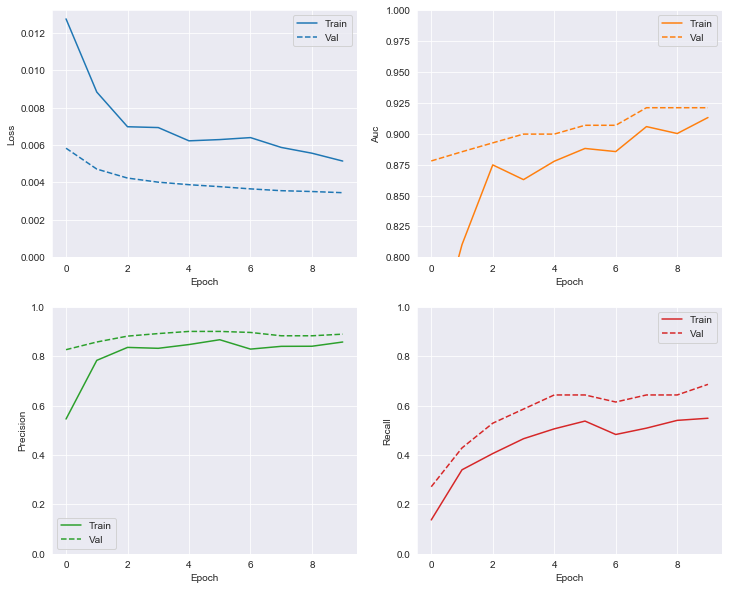

In [157]:
plot_metrics(weighted_history)

In [158]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.0024675448005461466

tp :  57.0

fp :  9.0

tn :  56881.0

fn :  15.0

accuracy :  0.99957865

precision :  0.8636364

recall :  0.7916667

auc :  0.937205

Legitimate Transactions Detected (True Negatives):  56881
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  57
Total Fraudulent Transactions:  72


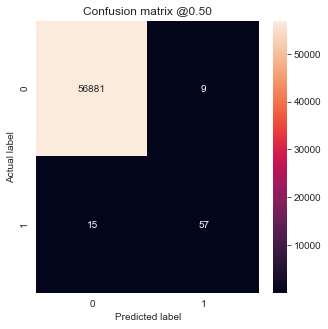

In [159]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
    print()

plot_cm(test_labels, test_predictions_weighted)

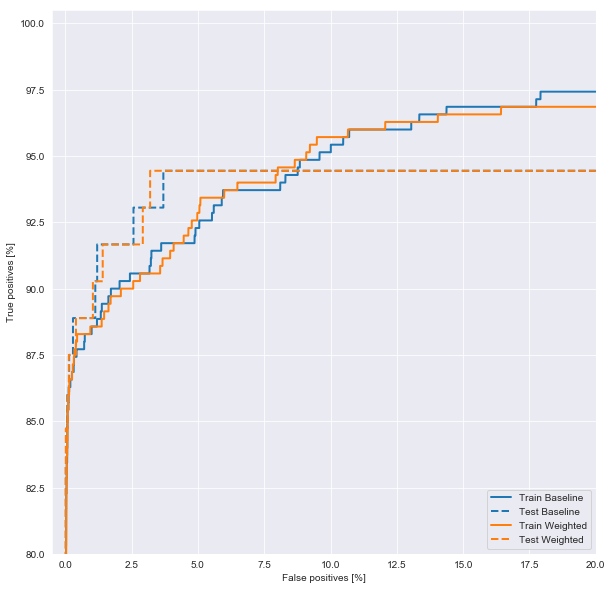

In [160]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [161]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [162]:
len(pos_features)

350

In [163]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))
res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181926, 29)

In [164]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363852, 29)

In [183]:
# BUFFER_SIZE = 100000

# def make_ds(features, labels):
#     ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
#     ds = ds.shuffle(BUFFER_SIZE).repeat()
#     return ds

# pos_ds = make_ds(pos_features, pos_labels)
# neg_ds = make_ds(neg_features, neg_labels)



In [184]:
# resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
# resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [185]:
resampled_labels.mean()

0.5

In [186]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

In [193]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks = [early_stopping],
    validation_data=val_ds)

Epoch 1/10
278/278 [==============================] - 40s 145ms/step - loss: 1.0242 - tp: 165446.0000 - fp: 1796.0000 - tn: 282908.0000 - fn: 119194.0000 - accuracy: 0.7875 - precision: 0.9893 - recall: 0.5812 - auc: 0.8606 - val_loss: 0.0241 - val_tp: 53.0000 - val_fp: 141.0000 - val_tn: 45358.0000 - val_fn: 17.0000 - val_accuracy: 0.9965 - val_precision: 0.2732 - val_recall: 0.7571 - val_auc: 0.9787
Epoch 2/10
278/278 [==============================] - 15s 55ms/step - loss: 0.3386 - tp: 238736.0000 - fp: 6760.0000 - tn: 278296.0000 - fn: 45552.0000 - accuracy: 0.9081 - precision: 0.9725 - recall: 0.8398 - auc: 0.9478 - val_loss: 0.0504 - val_tp: 60.0000 - val_fp: 525.0000 - val_tn: 44974.0000 - val_fn: 10.0000 - val_accuracy: 0.9883 - val_precision: 0.1026 - val_recall: 0.8571 - val_auc: 0.9868
Epoch 3/10
278/278 [==============================] - 15s 55ms/step - loss: 0.2661 - tp: 249047.0000 - fp: 8407.0000 - tn: 276469.0000 - fn: 35421.0000 - accuracy: 0.9230 - precision: 0.9673 -

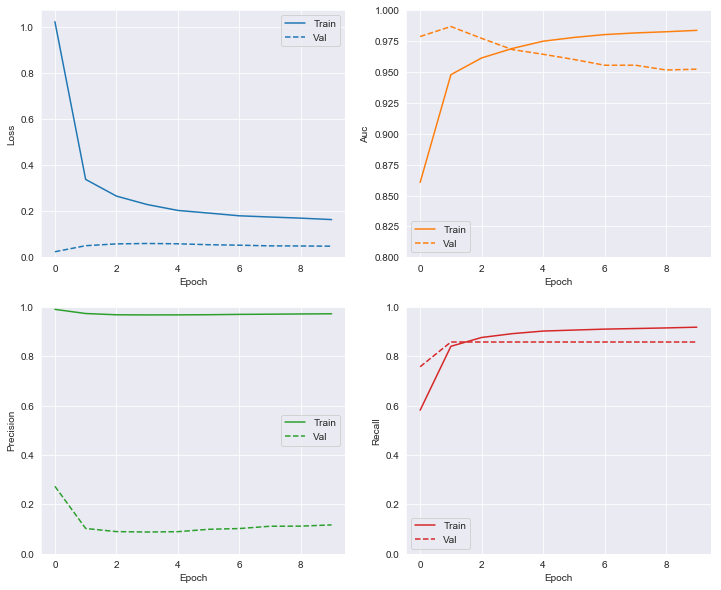

In [194]:
plot_metrics(resampled_history )

In [195]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))

Epoch 1/100
20/20 [==============================] - 27s 1s/step - loss: 3.2404 - tp: 1041.0000 - fp: 14.0000 - tn: 20587.0000 - fn: 19318.0000 - accuracy: 0.5280 - precision: 0.9867 - recall: 0.0511 - auc: 0.6251 - val_loss: 0.0097 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 45498.0000 - val_fn: 70.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7167
Epoch 2/100
20/20 [==============================] - 2s 76ms/step - loss: 2.2382 - tp: 3674.0000 - fp: 27.0000 - tn: 20352.0000 - fn: 16907.0000 - accuracy: 0.5866 - precision: 0.9927 - recall: 0.1785 - auc: 0.7398 - val_loss: 0.0074 - val_tp: 11.0000 - val_fp: 6.0000 - val_tn: 45493.0000 - val_fn: 59.0000 - val_accuracy: 0.9986 - val_precision: 0.6471 - val_recall: 0.1571 - val_auc: 0.8821
Epoch 3/100
20/20 [==============================] - 2s 77ms/step - loss: 1.6048 - tp: 6419.0000 - fp: 42.0000 - tn: 20412.0000 - fn: 14087.0000 - accuracy: 0.6551 - precision: 0.9935 - recall: 0.3130 -

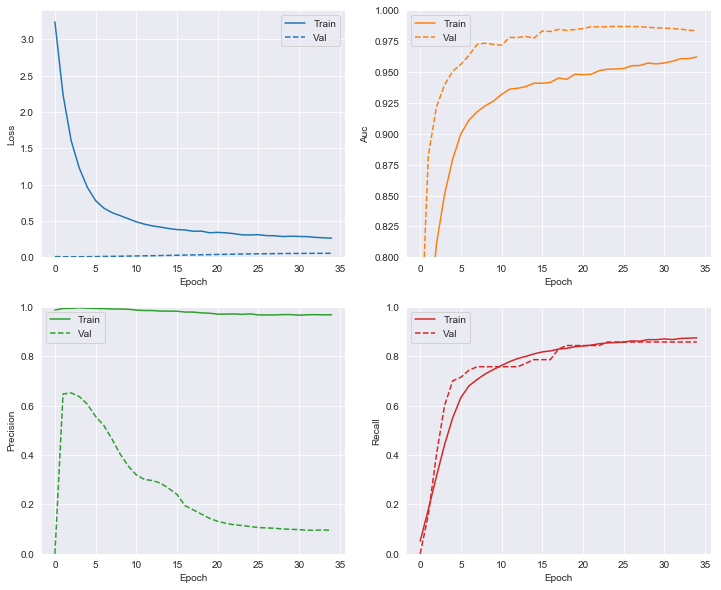

In [196]:
plot_metrics(resampled_history)

In [197]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.04724061675925636

tp :  64.0

fp :  639.0

tn :  56251.0

fn :  8.0

accuracy :  0.98864156

precision :  0.091038406

recall :  0.8888889

auc :  0.96419954

Legitimate Transactions Detected (True Negatives):  56251
Legitimate Transactions Incorrectly Detected (False Positives):  639
Fraudulent Transactions Missed (False Negatives):  8
Fraudulent Transactions Detected (True Positives):  64
Total Fraudulent Transactions:  72


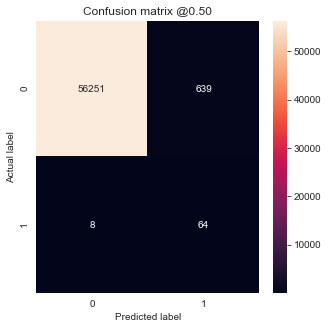

In [198]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(name, ': ', value)
    print()

plot_cm(test_labels, test_predictions_resampled)

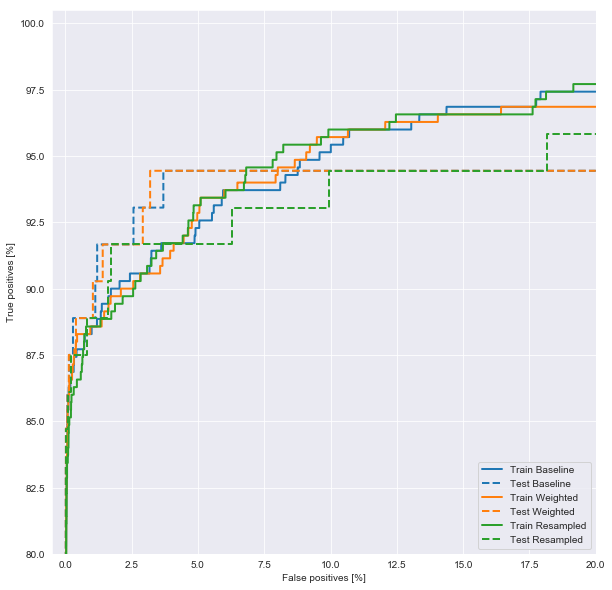

In [199]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled,  color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled,  color=colors[2], linestyle='--')
plt.legend(loc='lower right')